<a href="https://colab.research.google.com/github/iv53ca/meshes/blob/main/1st_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install gmsh

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
pip install --upgrade gmsh

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import sys
import gmsh
import math
from IPython.display import Image, display
from math import *

In [5]:
gmsh.initialize()
gmsh.model.add("t1")
lc = 1e-2
gmsh.model.geo.addPoint(0, 0, 0, lc, 1)
gmsh.model.geo.addPoint(.1, 0, 0, lc, 2)
gmsh.model.geo.addPoint(.1, .3, 0, lc, 3)
p4 = gmsh.model.geo.addPoint(0, .3, 0, lc)
gmsh.model.geo.addLine(1, 2, 1)
gmsh.model.geo.addLine(3, 2, 2)
gmsh.model.geo.addLine(3, p4, 3)
gmsh.model.geo.addLine(4, 1, p4)
gmsh.model.geo.addCurveLoop([4, 1, -2, 3], 1)
gmsh.model.geo.addPlaneSurface([1], 1)
gmsh.model.geo.synchronize()
gmsh.model.mesh.generate(2)
gmsh.write("t1.msh")
gmsh.finalize()

In [6]:
!pip install meshio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import meshio

In [8]:
meshio.read("t1.msh")

<meshio mesh object>
  Number of points: 404
  Number of cells:
    vertex: 1
    vertex: 1
    vertex: 1
    vertex: 1
    line: 10
    line: 30
    line: 10
    line: 30
    triangle: 726
  Cell sets: gmsh:bounding_entities
  Point data: gmsh:dim_tags
  Cell data: gmsh:geometrical

<Figure size 640x480 with 0 Axes>

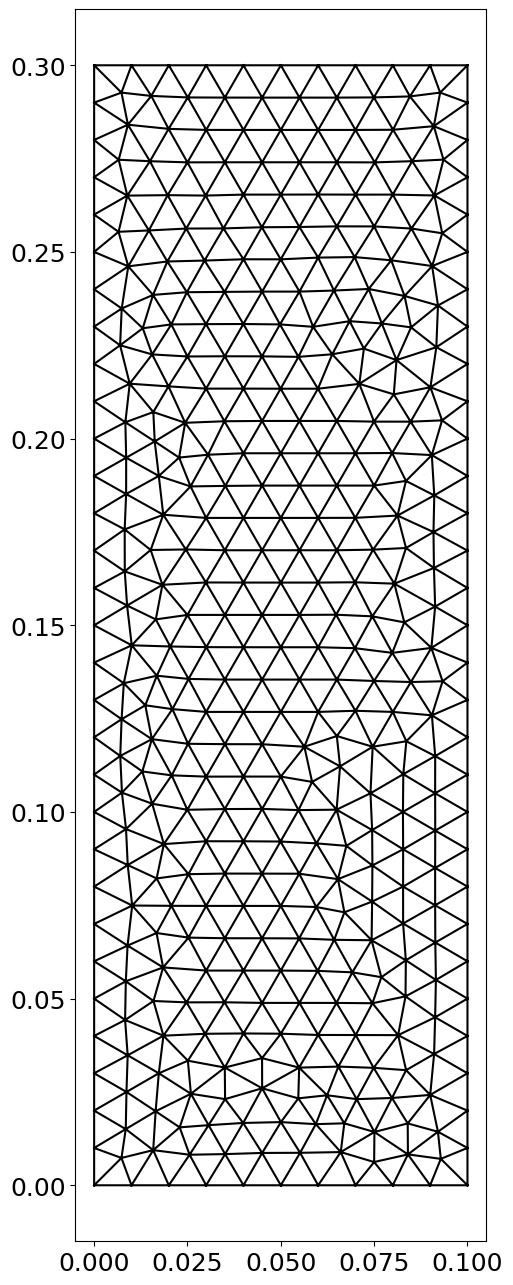

In [9]:
import matplotlib.pyplot as plt

reader = meshio.read("t1.msh")
x = reader.points

fig = plt.figure()
plt.rcParams["font.size"] = 18
plt.rcParams["figure.figsize"] = (10.0, 6.0)
plt.figure(figsize=(16, 16))
plt.triplot(x[:, 0], x[:, 1], color="black")
plt.gca().set_aspect("equal")
plt.savefig("mesh.svg")

Создание сетки на круг 2D

In [10]:
gmsh.initialize()
gmsh.clear()
gmsh.model.add("circle1")

<Figure size 1000x600 with 0 Axes>

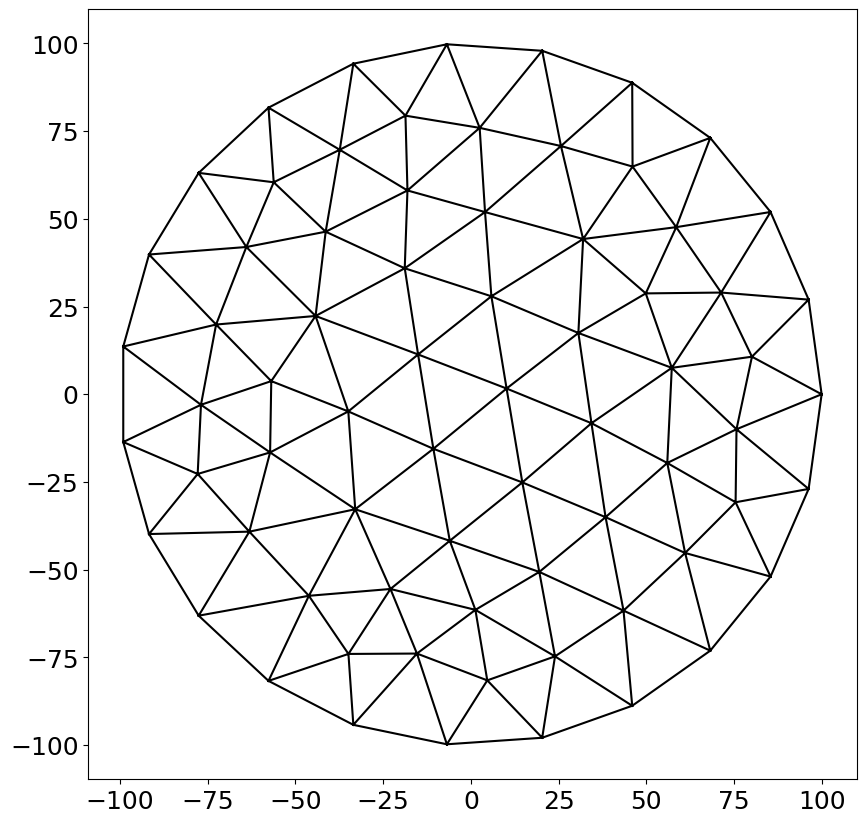

In [11]:
center_x = 0
center_y = 0
center_z = 0
radius = 1
lc = 10e-3
gmsh.model.occ.addCircle(0.0, 0.0, 0.0,100.0,1,angle1=0.,angle2=2*pi)
gmsh.model.occ.addCurveLoop([1] ,2)
gmsh.model.occ.addPlaneSurface([2],1)
gmsh.model.addPhysicalGroup(1, [1], 1)
gmsh.model.addPhysicalGroup(2, [1], 2)
gmsh.model.occ.synchronize()
gmsh.model.mesh.generate(2)
gmsh.write("circle1.msh")
gmsh.finalize()
reader = meshio.read("circle1.msh")
x = reader.points
fig = plt.figure()
plt.rcParams["font.size"] = 18
plt.rcParams["figure.figsize"] = (10.0, 6.0)
plt.figure(figsize=(10, 10))
plt.triplot(x[:, 0], x[:, 1], color="black")
plt.gca().set_aspect("equal")
plt.savefig("mesh.svg")

Создание цилиндра 3D

In [12]:
gmsh.initialize()
gmsh.clear()
gmsh.model.add("cylinder")
lc = 10e-3
circle = gmsh.model.occ.addCircle(center_x, center_y, center_z, radius, tag = -1)
gmsh.model.occ.addCurveLoop([circle] ,2)
surface = gmsh.model.occ.addPlaneSurface([2],1)
gmsh.model.occ.synchronize()
base_surf_pg = gmsh.model.addPhysicalGroup(2,[surface],tag = 100,name="lower_surface")
h = 1
subdivision = [10]
extrusion = gmsh.model.occ.extrude([(2, surface)], 0, 0, h, subdivision)
gmsh.model.occ.synchronize()
volume = gmsh.model.addPhysicalGroup(3, [extrusion[1][1]], name="volume")
lateral_surf_group = gmsh.model.addPhysicalGroup(2, [extrusion[2][1]], tag = 101, name="lateral_surface")
upper_surf_group = gmsh.model.addPhysicalGroup(2, [extrusion[0][1]], tag = 102, name="upper_surface")
gmsh.model.mesh.generate(3)
gmsh.write("cylinder.msh")
gmsh.finalize()

Создание сетки на тор

In [13]:
import gmsh
import math
import os
import sys

In [14]:
gmsh.initialize()
gmsh.clear()

In [15]:
gmsh.merge(os.path.join('model.stl'))
forceParametrizablePatches = False
includeBoundary = True
angle = 20
curveAngle = 180
gmsh.model.mesh.classifySurfaces(angle * math.pi / 180., includeBoundary,
                                 forceParametrizablePatches,
                                 curveAngle * math.pi / 180.)

In [ ]:
gmsh.model.mesh.createGeometry()
s = gmsh.model.getEntities(2)
l = gmsh.model.geo.addSurfaceLoop([s[i][1] for i in range(len(s))])
gmsh.model.geo.addVolume([l])
gmsh.model.geo.synchronize()
funny = False
f = gmsh.model.mesh.field.add("MathEval")
if funny:
    gmsh.model.mesh.field.setString(f, "F", "2*Sin((x+y)/5) + 3")
else:
    gmsh.model.mesh.field.setString(f, "F", "10")
gmsh.model.mesh.field.setAsBackgroundMesh(f)
gmsh.model.mesh.generate(3)
gmsh.write('model.msh')
gmsh.finalize()

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
reader = meshio.read("model.msh")
x = reader.points
fig = plt.figure()
plt.rcParams["font.size"] = 18
plt.rcParams["figure.figsize"] = (10.0, 6.0)
plt.figure(figsize=(10, 10))
plt.triplot(x[:, 0], x[:, 1], color="black")
plt.gca().set_aspect("equal")
plt.savefig("mesh.svg")